In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("words.csv")

Data Processing


In [ ]:
df['English'] = df['English'].apply(lambda x: f"<start> {x} <end>")
df['Minionese'] = df['Minionese'].apply(lambda x: f"<start> {x} <end>")

df.sample(3)


,English,Minionese
595,<start> mountain <end>,<start> monton <end>
3342,<start> behalf <end>,<start> oohrev <end>
2976,<start> Israel <end>,<start> abam <end>


In [ ]:
df.head()

,English,Minionese
0,<start> the <end>,<start> ta <end>
1,<start> be <end>,<start> be <end>
2,<start> to <end>,<start> da <end>
3,<start> of <end>,<start> de <end>
4,<start> and <end>,<start> yee <end>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   English    9073 non-null   object
 1   Minionese  9073 non-null   object
dtypes: object(2)
memory usage: 141.9+ KB


In [ ]:
df.describe()

,English,Minionese
count,9073,9073
unique,9073,7835
top,<start> the <end>,<start> mac <end>
freq,1,9


In [ ]:
import numpy as np
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.preprocessing.text  import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [ ]:
df = df.apply(lambda x: x.str.lower())
df = df.dropna()

In [ ]:
df.sample(3)

,English,Minionese
8847,<start> fundamentals <end>,<start> ryehie <end>
5540,<start> november <end>,<start> boxars <end>
2141,<start> crime <end>,<start> ill <end>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   English    9073 non-null   object
 1   Minionese  9073 non-null   object
dtypes: object(2)
memory usage: 141.9+ KB


In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip


In [ ]:
#!unzip glove*.zip


Data Tokenization


In [ ]:
token_eng = Tokenizer(filters='')
token_eng.fit_on_texts(df['English'])
seq_eng = token_eng.texts_to_sequences(df['English'])

token_min = Tokenizer(filters='')
token_min.fit_on_texts(df['Minionese'])
seq_min = token_min.texts_to_sequences(df['Minionese'])

num_eng_words = len(token_eng.word_index) + 1
num_min_words = len(token_min.word_index) + 1

print(f"English Vocabulary Size: {len(token_eng.word_index)}")
print(f"Minionese Vocabulary Size: {len(token_min.word_index)}")


English Vocabulary Size: 9040
Minionese Vocabulary Size: 7829


Data Padding

In [ ]:
eng_length = max(len(seq) for seq in seq_eng)
min_length = max(len(seq) for seq in seq_min)

seq_eng = pad_sequences(seq_eng, maxlen=eng_length, padding='post')
seq_min = pad_sequences(seq_min, maxlen=min_length, padding='post')
print(f"Padded English Sequences: {seq_eng[:3]}")
print(f"Padded Minionese Sequences: {seq_min[:3]}")


Padded English Sequences: [[ 1 74  2  0  0  0]
 [ 1 75  2  0  0  0]
 [ 1 16  2  0  0  0]]
Padded Minionese Sequences: [[ 1  9  2  0  0  0  0]
 [ 1 10  2  0  0  0  0]
 [ 1 62  2  0  0  0  0]]


Data Embedding


In [ ]:
# Load GloVe embeddings
embeddings_index = {}
embedding_dim = 100
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")


Loaded 400000 word vectors.


In [ ]:
num_eng_words = len(token_eng.word_index) + 1
embedding_matrix_eng = np.zeros((num_eng_words, embedding_dim))
for word, i in token_eng.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_eng[i] = embedding_vector

print(f"English Vocabulary Size: {num_eng_words}")
print(f"Embedding Matrix Shape: {embedding_matrix_eng.shape}")

English Vocabulary Size: 9041
Embedding Matrix Shape: (9041, 100)


In [ ]:
print(token_eng.word_index)

{'<start>': 1, '<end>': 2, 'new': 3, 'you': 4, 'squash': 5, 'city': 6, 'rock': 7, 'stop': 8, 'hee': 9, 'united': 10, 'north': 11, 'carolina': 12, 'dakota': 13, 'south': 14, 'las': 15, 'to': 16, 'and': 17, 'i': 18, 'for': 19, 'at': 20, 'we': 21, 'my': 22, 'can': 23, 'no': 24, 'look': 25, 'star': 26, 'dust': 27, 'oh': 28, 'sorry': 29, 'ice': 30, 'cream': 31, 'start': 32, 'beyond': 33, 'thank': 34, 'love': 35, "i'm": 36, 'eat': 37, 'banana': 38, 'potato': 39, 'sweet': 40, 'melon': 41, 'fruit': 42, 'mexico': 43, 'kingdom': 44, 'states': 45, 'delhi': 46, 'rio': 47, 'de': 48, 'york': 49, 'rhode': 50, 'island': 51, 'washington': 52, 'dc': 53, 'puerto': 54, 'rico': 55, 'virginia': 56, 'oklahoma': 57, 'west': 58, 'hampshire': 59, 'little': 60, 'des': 61, 'rouge': 62, 'paul': 63, 'jefferson': 64, 'santa': 65, 'fe': 66, 'los': 67, 'angeles': 68, 'vegas': 69, 'orleans': 70, 'louis': 71, 'green': 72, 'bay': 73, 'the': 74, 'be': 75, 'of': 76, 'a': 77, 'in': 78, 'that': 79, 'romance': 80, 'it': 81, '

In [ ]:
print(token_min.word_index)

{'<start>': 1, '<end>': 2, 'mac': 3, 'ka': 4, 'lam': 5, 'si': 6, 'dex': 7, 'rya': 8, 'ta': 9, 'be': 10, 'bap': 11, 'heh': 12, 'kop': 13, 'teg': 14, 'lye': 15, 'vav': 16, 'zzz': 17, 'ono': 18, 'rob': 19, 'aff': 20, 'din': 21, 'orb': 22, 'en': 23, 'sim': 24, 'la': 25, 'ed': 26, 'kay': 27, 'bi': 28, 'at': 29, 'cap': 30, 'gin': 31, 'pee': 32, 'fin': 33, 'cru': 34, 'keg': 35, 'hit': 36, 'ute': 37, 'tug': 38, 'kos': 39, 'fug': 40, 'gee': 41, 'bed': 42, 'ore': 43, 'day': 44, 'beg': 45, 'nor': 46, 'for': 47, 'fop': 48, 'wat': 49, 'kob': 50, 'fas': 51, 'foy': 52, 'ahi': 53, 'ahs': 54, 'sky': 55, 'hug': 56, 'kid': 57, 'sod': 58, 'saw': 59, 'dud': 60, 'dad': 61, 'da': 62, 'nan': 63, 'pen': 64, 'ti': 65, 'do': 66, 'via': 67, 'aah': 68, 'beep': 69, 'go': 70, 'na': 71, 'ma': 72, 'uh': 73, 'ki': 74, 'gum': 75, 'bop': 76, 'gas': 77, 'mid': 78, 'nap': 79, 'dos': 80, 'haw': 81, 'are': 82, 'reg': 83, 'up': 84, 'rai': 85, 'lad': 86, 'sab': 87, 'flu': 88, 'udo': 89, 'dis': 90, 'oes': 91, 'app': 92, 'rah': 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(seq_eng[:], seq_min[:], test_size=0.2, random_state=42)

X_train = pad_sequences(seq_eng, maxlen=7, padding='post')
y_train = pad_sequences(seq_min, maxlen=7, padding='post')

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (9073, 7)
y_train shape: (9073, 7)


In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Dropout, RepeatVector
from keras.models import Model
import numpy as np

# Encoder input
encoder_inputs = Input(shape=(eng_length,))

encoder_embedding_layer = Embedding(input_dim=num_eng_words,
                                    output_dim=embedding_dim,
                                    weights=[embedding_matrix_eng],
                                    input_length=eng_length,
                                    trainable=False)(encoder_inputs)
encoder_lstm = Bidirectional(LSTM(units=512, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(encoder_embedding_layer)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

# Decoder input
decoder_inputs = Input(shape=(min_length,))
decoder_embedding_layer = Embedding(input_dim=num_min_words, output_dim=embedding_dim, input_length=min_length)(decoder_inputs)
decoder_repeat = RepeatVector(n=min_length)(encoder_states[0])
decoder_lstm = Bidirectional(LSTM(units=512, return_sequences=True, return_state=True))
decoder_lstm_outputs, forward_h, forward_c, backward_h, backward_c = decoder_lstm(decoder_embedding_layer, initial_state=encoder_states)
decoder_dropout = Dropout(0.3)(decoder_lstm_outputs)

output_dense_layer = Dense(units=num_min_words, activation='softmax')(decoder_dropout)

model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=output_dense_layer)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

# Compile model
model.summary()

# Train model


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_8 (Embedding)   │ (None, 7, 100)         │        904,100 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_9 (Embedding)   │ (None, 7, 100)         │        783,000 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_10          │ [(None, 1024), (None,  │      2,510,848 │ embedding_8[0][0]      │
│ (Bidirectional)           │ 512), (None, 512),     │                │                        │
│                           │ (None, 512), (None,    │                │                        │
│                           │ 512)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_11          │ [(None, 7, 1024),      │      2,510,848 │ embedding_9[0][0],     │
│ (Bidirectional)           │ (None, 512), (None,    │                │ bidirectional_10[0][1… │
│                           │ 512), (None, 512),     │                │ bidirectional_10[0][2… │
│                           │ (None, 512)]           │                │ bidirectional_10[0][3… │
│                           │                        │                │ bidirectional_10[0][4] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 7, 1024)        │              0 │ bidirectional_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 7, 7830)        │      8,025,750 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,734,546 (56.21 MB)

 Trainable params: 13,830,446 (52.76 MB)

 Non-trainable params: 904,100 (3.45 MB)

In [ ]:
history = model.fit([X_train, y_train], y_train, epochs=150, batch_size=32, validation_split=0.1)


X_train shape: (9073, 7)
y_train shape: (9073, 7)
Epoch 1/150


ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 7)

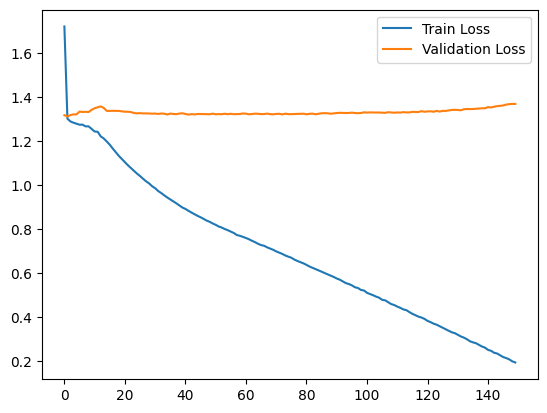

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate([X_test, y_test], y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8566 - loss: 1.3703
Test Loss: 1.3756442070007324
Test Accuracy: 0.8560411930084229


In [ ]:
# Example sentence from X_test (you can pick any sample)
sample_input = X_test[0]  # Assuming you want to test the first sample

# Check the tokenized and padded input (to see the padding and sequence)
print("Sample Input (Padded):", sample_input)


Sample Input (Padded): [  1 470   2   0   0   0]


In [ ]:
# Decoder input (start sequence)
decoder_input = np.zeros((1, min_length))  # Shape should be (batch_size, min_length)

# You can replace this with the actual target sequence if available, but for inference, zeroes are fine
print("Decoder Input (Initial):", decoder_input)


Decoder Input (Initial): [[0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Perform inference (predict the translation for the given input)
predicted_sequence = model.predict([sample_input.reshape(1, -1), decoder_input])

# The predicted sequence will be a matrix of probabilities for each word in the Minionese vocabulary
# We need to extract the word indices
predicted_indices = np.argmax(predicted_sequence, axis=-1)

print("Predicted Word Indices:", predicted_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Word Indices: [[0 0 0 0 0 0 0]]


In [ ]:
# Convert indices to words using the Minionese tokenizer
predicted_words = [token_min.index_word.get(index, '') for index in predicted_indices[0]]

# Join the words into a sentence
translated_sentence = ' '.join(predicted_words)

print("Translated Sentence (Minionese):", translated_sentence)


Translated Sentence (Minionese):       
